## We want to 'Evaluate our model Performance' and then 'Improving our model Performance'.

### We shall implement k-fold cross validation and GridSearch in our earlier developed kernel svm model. 

### Hyperparameters are the parameters we chose ourselves while model building. It can be optimized.

In [1]:
# Importing the dataset
dataset = read.csv('Social_Network_Ads.csv')
head(dataset)
dataset = dataset[3:5]

User.ID,Gender,Age,EstimatedSalary,Purchased
15624510,Male,19,19000,0
15810944,Male,35,20000,0
15668575,Female,26,43000,0
15603246,Female,27,57000,0
15804002,Male,19,76000,0
15728773,Male,27,58000,0


In [2]:
# Encoding the target feature as factor
dataset$Purchased = factor(dataset$Purchased, levels = c(0, 1))

In [3]:
# Splitting the dataset into the Training set and Test set
# install.packages('caTools')
library(caTools)
set.seed(123)
split = sample.split(dataset$Purchased, SplitRatio = 0.75)
training_set = subset(dataset, split == TRUE)
test_set = subset(dataset, split == FALSE)

In [4]:
# Feature Scaling
training_set[-3] = scale(training_set[-3])
test_set[-3] = scale(test_set[-3])

In [5]:
# Fitting Kernel SVM to the Training set
# install.packages('e1071')
library(e1071)
classifier = svm(formula = Purchased ~ .,
                 data = training_set,
                 type = 'C-classification',
                 kernel = 'radial')

In [6]:
# Predicting the Test set results
y_pred = predict(classifier, newdata = test_set[-3])

In [7]:
# Making the Confusion Matrix
table(test_set[, 3], y_pred)

   y_pred
     0  1
  0 58  6
  1  4 32

In [8]:
# Applying k-Fold Cross Validation
# install.packages('caret')
library(caret)
folds = createFolds(training_set$Purchased, k = 10)
cv = lapply(folds, function(x) {
  training_fold = training_set[-x, ]
  test_fold = training_set[x, ]
  classifier = svm(formula = Purchased ~ .,
                   data = training_fold,
                   type = 'C-classification',
                   kernel = 'radial')
  y_pred = predict(classifier, newdata = test_fold[-3])
  cm = table(test_fold[, 3], y_pred)
  accuracy = (cm[1,1] + cm[2,2]) / (cm[1,1] + cm[2,2] + cm[1,2] + cm[2,1])
  return(accuracy)
})
accuracy = mean(as.numeric(cv))

Loading required package: lattice
Loading required package: ggplot2


In [9]:
accuracy

[1] 0.9105302

In [10]:
# Applying Grid Search to find the best parameters
# install.packages('caret') 
library(caret)
classifier = train(form = Purchased ~ ., data = training_set, method = 'svmRadial') #Caret contains all kind of ML packages

In [11]:
classifier

Support Vector Machines with Radial Basis Function Kernel 

300 samples
  2 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 300, 300, 300, 300, 300, 300, ... 
Resampling results across tuning parameters:

  C     Accuracy   Kappa    
  0.25  0.9169594  0.8219450
  0.50  0.9172678  0.8229936
  1.00  0.9177174  0.8234902

Tuning parameter 'sigma' was held constant at a value of 2.251496
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were sigma = 2.251496 and C = 1.

In [12]:
classifier$bestTune

,sigma,C
3,2.251496,1


### Our Model performs quite close to found by GridSearch

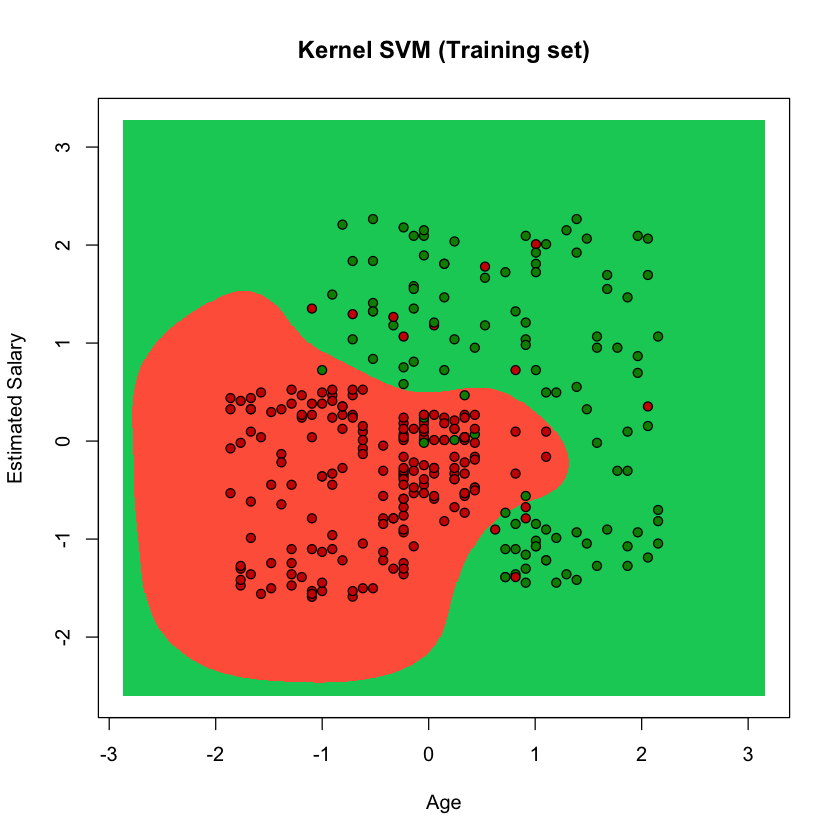

In [13]:
# Visualising the Training set results
library(ElemStatLearn)
set = training_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
y_grid = predict(classifier, newdata = grid_set)
plot(set[, -3],
     main = 'Kernel SVM (Training set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))

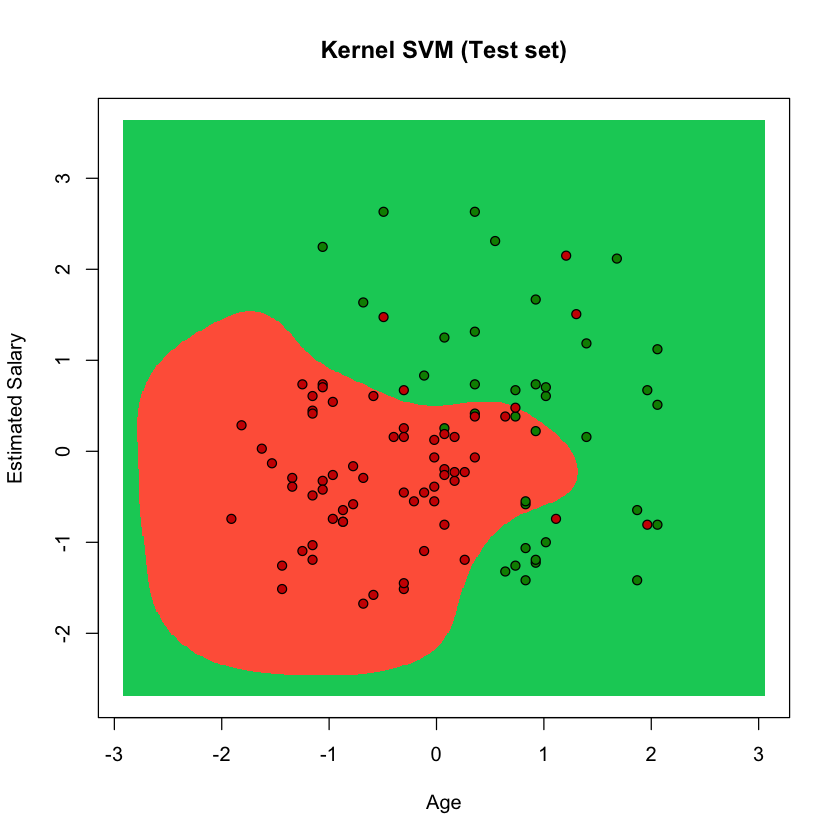

In [14]:
#Visualising the Test set results
library(ElemStatLearn)
set = test_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
y_grid = predict(classifier, newdata = grid_set)
plot(set[, -3], main = 'Kernel SVM (Test set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))